## FORECASTING OF CO2 DATASET

In [1]:
import warnings
import itertools
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pylab
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 12
import statsmodels.formula.api as smf 
from statsmodels.tsa.seasonal import seasonal_decompose
import sklearn as sk
import scipy

In [74]:
import warnings
import itertools
warnings.filterwarnings("ignore") 


In [75]:
dateparse = lambda x: pd.to_datetime(x, format='%Y', errors = 'coerce')
CO2_1 = pd.read_excel("CO2 dataset.xlsx", parse_dates=['Year'], index_col='Year', date_parser=dateparse) 
CO2_1.head()

,CO2
Year,
1800-01-01,0.00568
1801-01-01,0.00561
1802-01-01,0.00555
1803-01-01,0.00548
1804-01-01,0.00542


In [4]:
CO2_1

,CO2
Year,
1800-01-01,0.00568
1801-01-01,0.00561
1802-01-01,0.00555
1803-01-01,0.00548
1804-01-01,0.00542
...,...
2010-01-01,15.60000
2011-01-01,15.60000
2012-01-01,14.80000


In [5]:
CO2_1.shape #number of rows and columns

(215, 1)

In [6]:
CO2_1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 215 entries, 1800-01-01 to 2014-01-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   CO2     215 non-null    float64
dtypes: float64(1)
memory usage: 3.4 KB


In [7]:
CO2_1.describe()

,CO2
count,215.000000
mean,6.741970
std,6.522437
min,0.001750
25%,0.041050
50%,6.390000
75%,11.500000
max,18.200000


In [8]:
print(CO2_1.isnull().sum()) #to check null values

CO2    0
dtype: int64


#### the above codes showed that dataset dosen't any null values.

##       VISUALIZATION AND DECOMPOSITION OF DATA

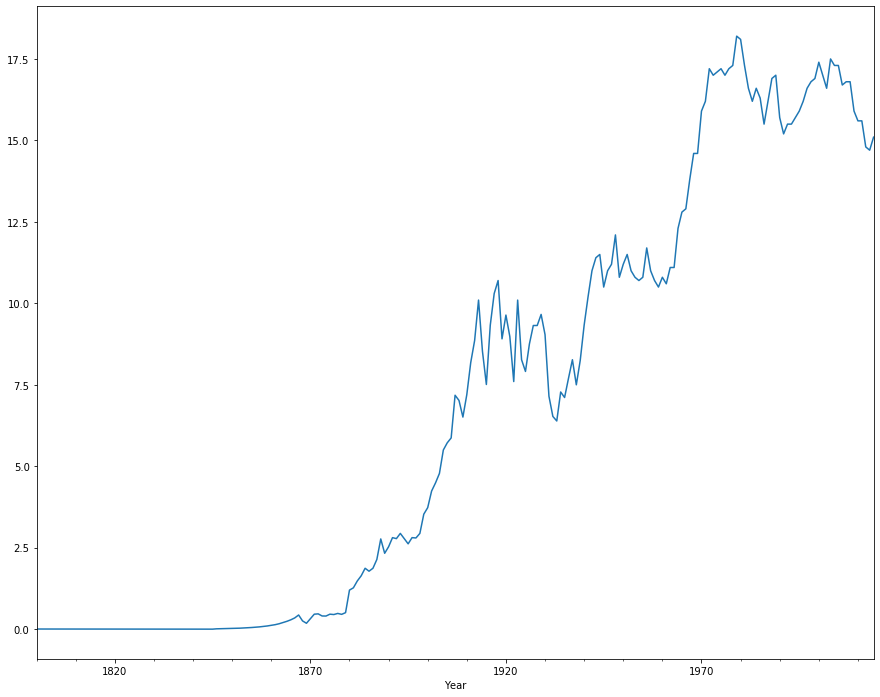

In [9]:
CO2_1.CO2.plot()  #to check the type of data

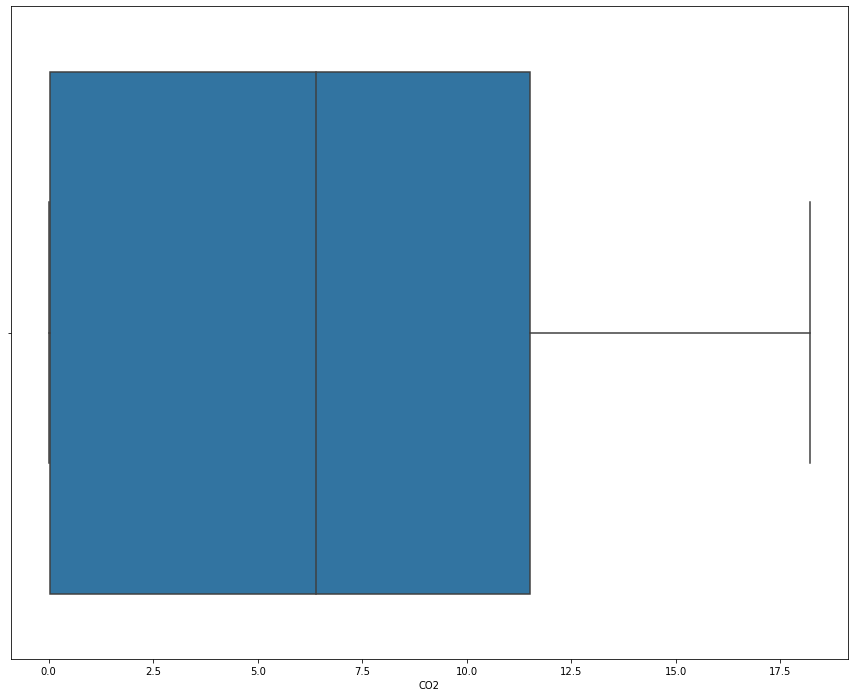

In [10]:
sns.boxplot(CO2_1['CO2']) #to check any outliers

In [11]:
plt.figure()



<Figure size 1080x864 with 0 Axes>

<Figure size 1080x864 with 0 Axes>

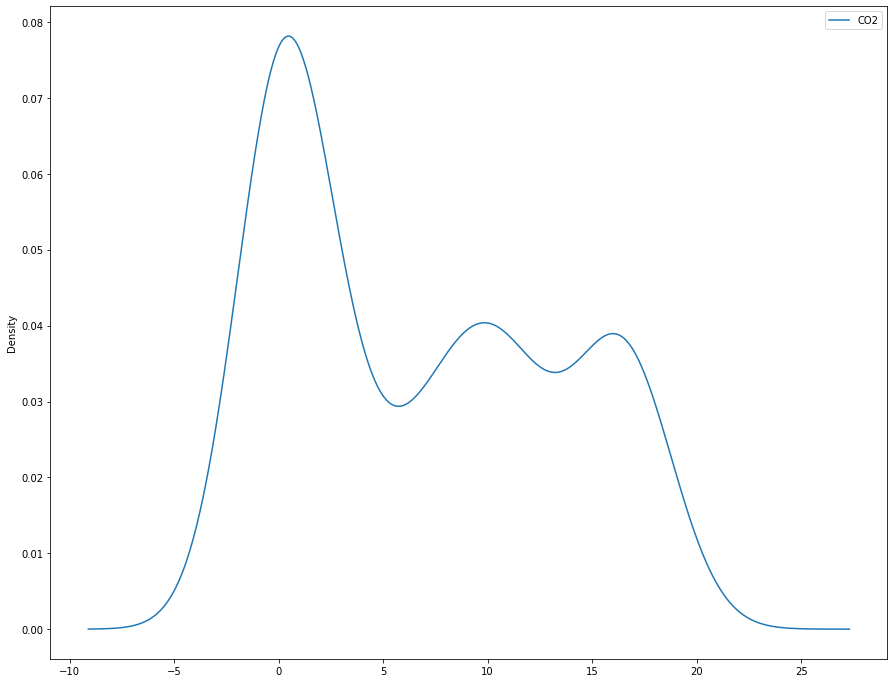

In [12]:
CO2_1.plot(kind='kde')


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027EB5115348>]],
      dtype=object)

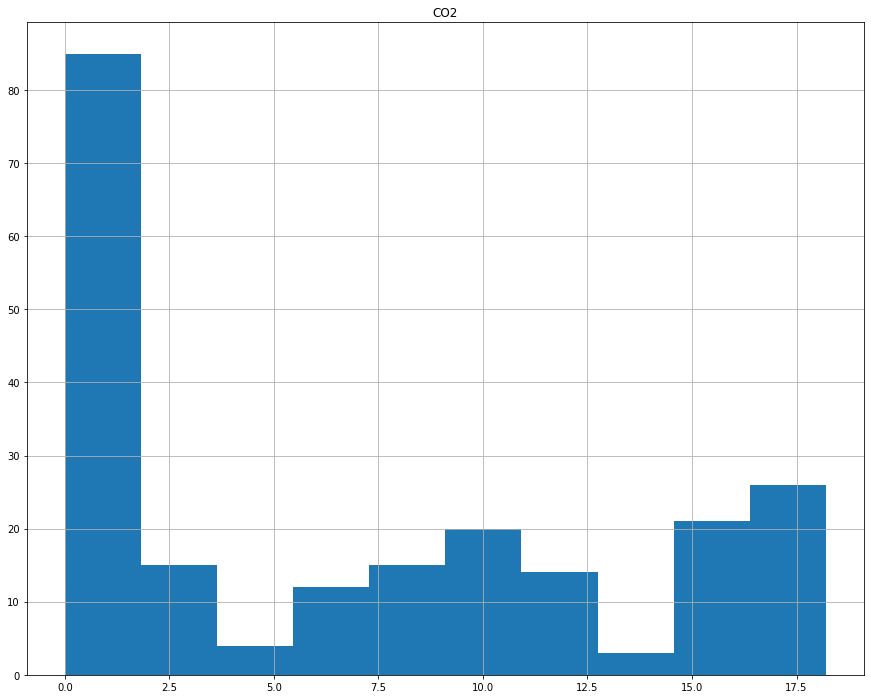

In [13]:
CO2_1.hist()

In [14]:
plt.show()

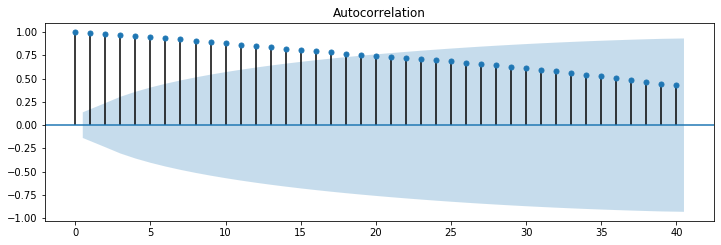

In [15]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(CO2_1.iloc[13:], lags=40, ax=ax1)

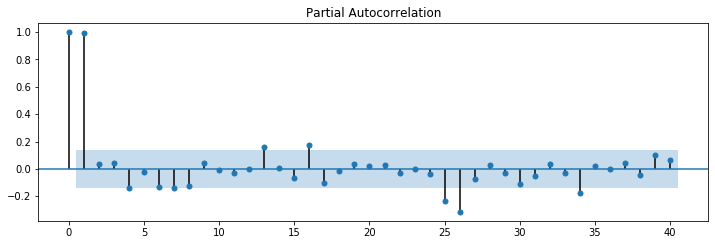

In [16]:
fig = plt.figure(figsize=(12,8))
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(CO2_1.iloc[13:], lags=40, ax=ax2)

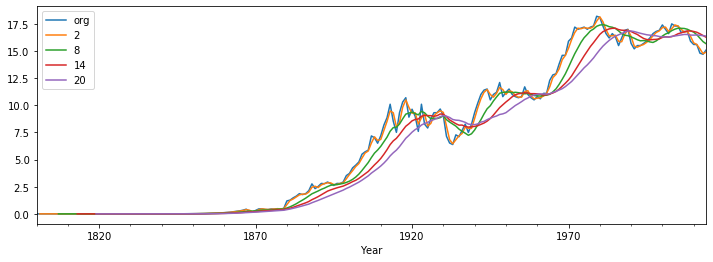

In [17]:
plt.figure(figsize=(12,4))
CO2_1.CO2.plot(label="org")
for i in range(2,24,6):
    CO2_1["CO2"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')

#### The emissions mean and the variation in standard deviation clearly vary with time. This shows that the series has a trend. So, it is not a stationary.

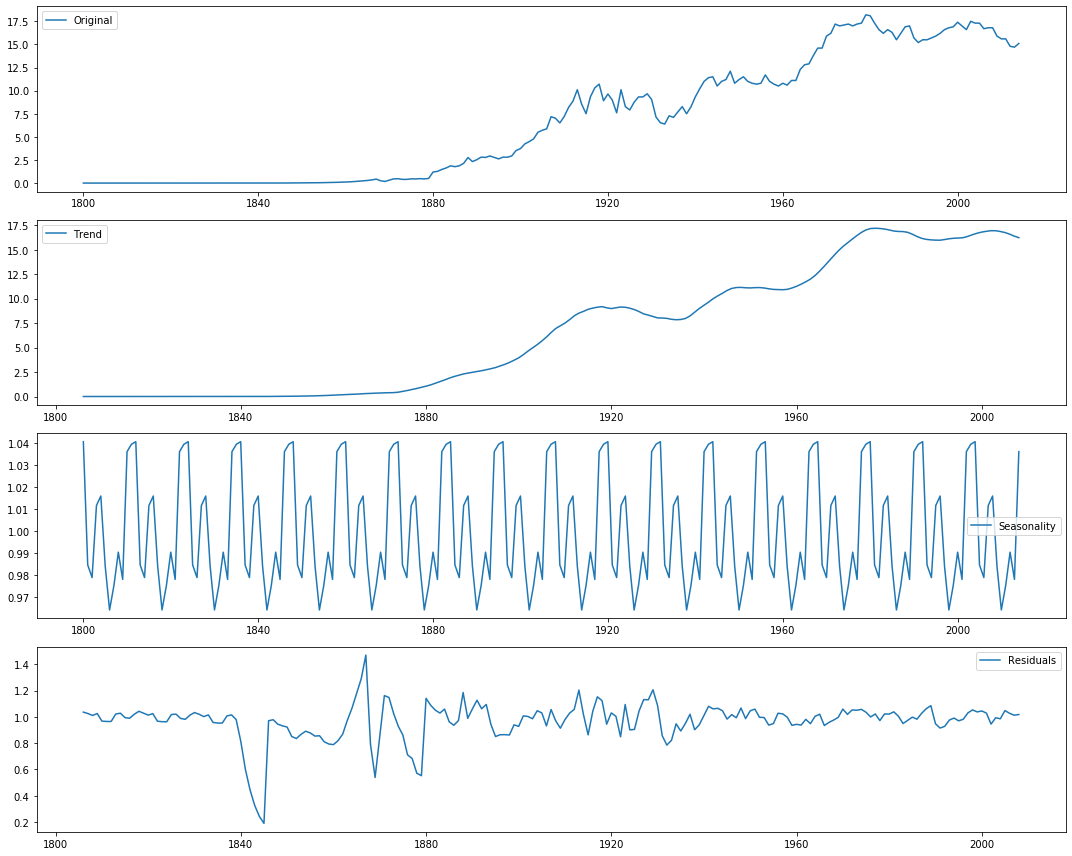

In [18]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(CO2_1.CO2,freq=12,model="multiplicative")

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(CO2_1, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

#### 1.The above plots clearly shows that our data is not stationary.
#### 2.The data is not seasonal and shows an upward trend.     
     

## GRAPHICALLY TESTED STATIONARY

In [19]:
import statsmodels
import statsmodels.api as sm
from statsmodels.tsa.stattools import coint, adfuller

In [20]:
def TestStationaryPlot(ts):
    rol_mean = ts.rolling(window = 12, center = False).mean()
    rol_std = ts.rolling(window = 12, center = False).std()
    
    plt.plot(ts, color = 'blue',label = 'Original Data')
    plt.plot(rol_mean, color = 'red', label = 'Rolling Mean')
    plt.plot(rol_std, color ='black', label = 'Rolling Std')
    plt.xticks(fontsize = 10)
    plt.yticks(fontsize = 10)
    
    plt.xlabel('Time in Years', fontsize = 10)
    plt.ylabel('Total Emissions', fontsize = 10)
    plt.legend(loc='best', fontsize = 10)
    plt.title('Rolling Mean & Standard Deviation', fontsize = 10)
    plt.show(block= True)


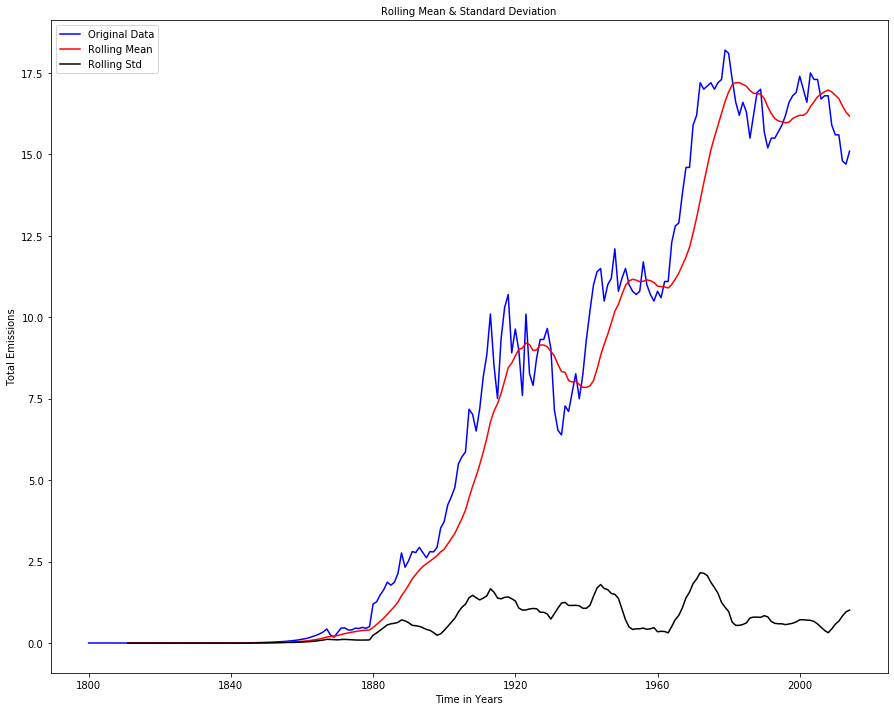

In [21]:
TestStationaryPlot(CO2_1)

##  TEST STATIONARY USING DICKEY-FULLER

In [22]:
def TestStationaryAdfuller(ts, cutoff = 0.01):
    ts_test = adfuller(ts, autolag = 'AIC')
    ts_test_output = pd.Series(ts_test[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    
    for key,value in ts_test[4].items():
        ts_test_output['Critical Value (%s)'%key] = value
    print(ts_test_output)
    
    if ts_test[1] <= cutoff:
        print("Strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root, hence it is stationary")
    else:
        print("Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
        

In [23]:
TestStationaryAdfuller(CO2_1)

Test Statistic                  -0.378463
p-value                          0.913633
#Lags Used                       0.000000
Number of Observations Used    214.000000
Critical Value (1%)             -3.461282
Critical Value (5%)             -2.875143
Critical Value (10%)            -2.574020
dtype: float64
Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


###  we tested graphically and using hypothesis testing to check our dataset and found it is not stationary.

## TO TANSFORM THE DATASET INTO STATIONARY

### A] The most common method of dealing with both trend and seasonality is differencing. 

### Eliminating trend and seasonality: Differencing

In [24]:
CO2_first_difference = CO2_1 - CO2_1.shift(1)
CO2_1

,CO2
Year,
1800-01-01,0.00568
1801-01-01,0.00561
1802-01-01,0.00555
1803-01-01,0.00548
1804-01-01,0.00542
...,...
2010-01-01,15.60000
2011-01-01,15.60000
2012-01-01,14.80000


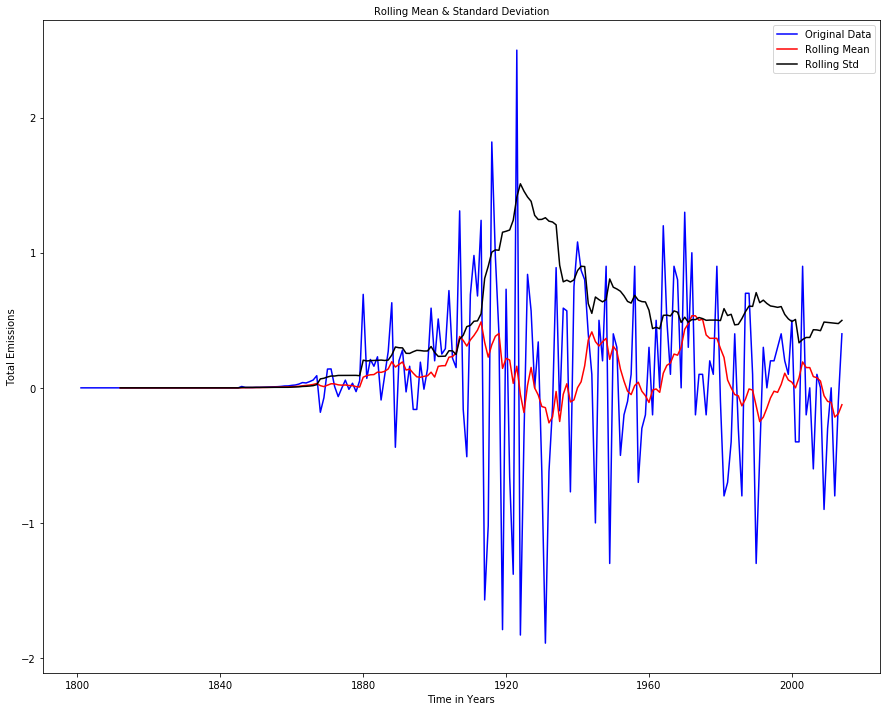

In [25]:
TestStationaryPlot(CO2_first_difference.dropna(inplace=False))

In [26]:
TestStationaryAdfuller(CO2_first_difference.dropna(inplace=False))

Test Statistic                  -3.780005
p-value                          0.003119
#Lags Used                      15.000000
Number of Observations Used    198.000000
Critical Value (1%)             -3.463815
Critical Value (5%)             -2.876251
Critical Value (10%)            -2.574611
dtype: float64
Strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root, hence it is stationary


###  the Test Statistic and the p-value, taking the intergrated of order one has made our the time series dataset stationary.

###  B] We can also try logarithmic tranformation to make our data stationary.

### The above results shows first order differencing is the best technique to make the data statioanry.

## ELIMINATING TREND : DECOMPOSING

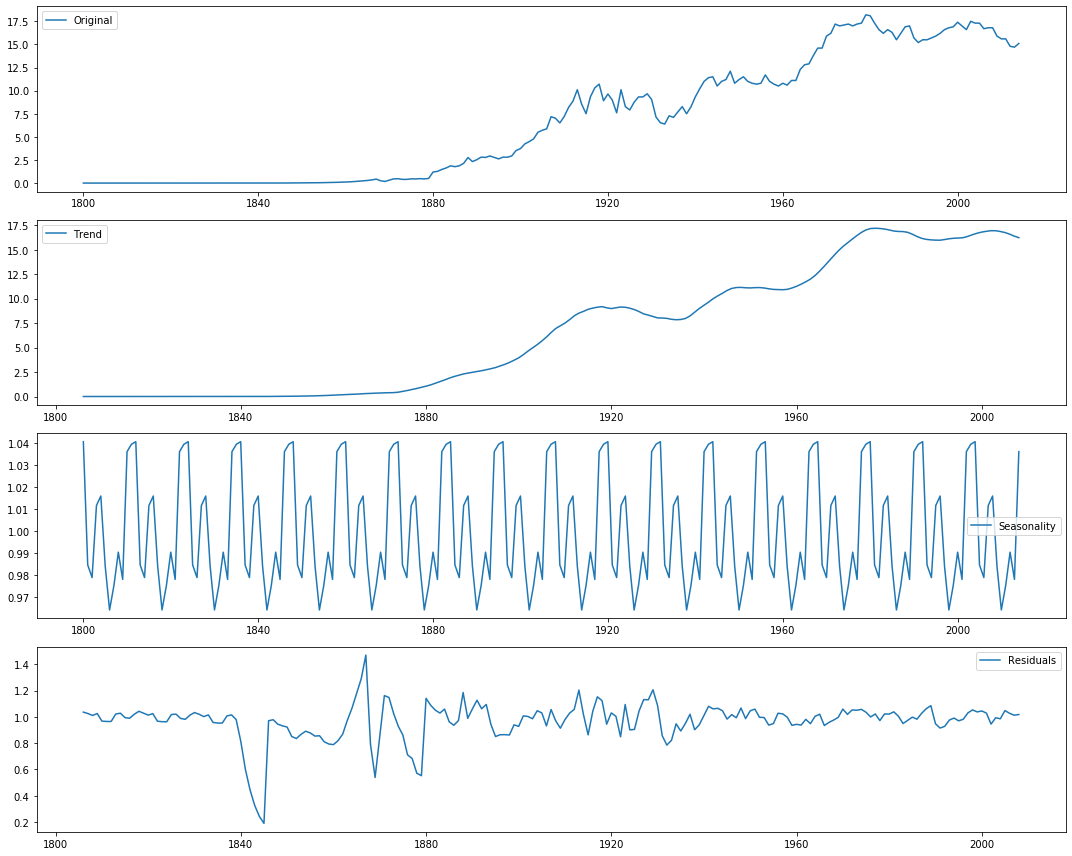

In [27]:
decomposition = seasonal_decompose(CO2_1,freq=12,model="multiplicative")

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(CO2_1, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

###  Here we can see that the trend is separated out from data and we can model the residuals. Lets check stationarity of residuals:

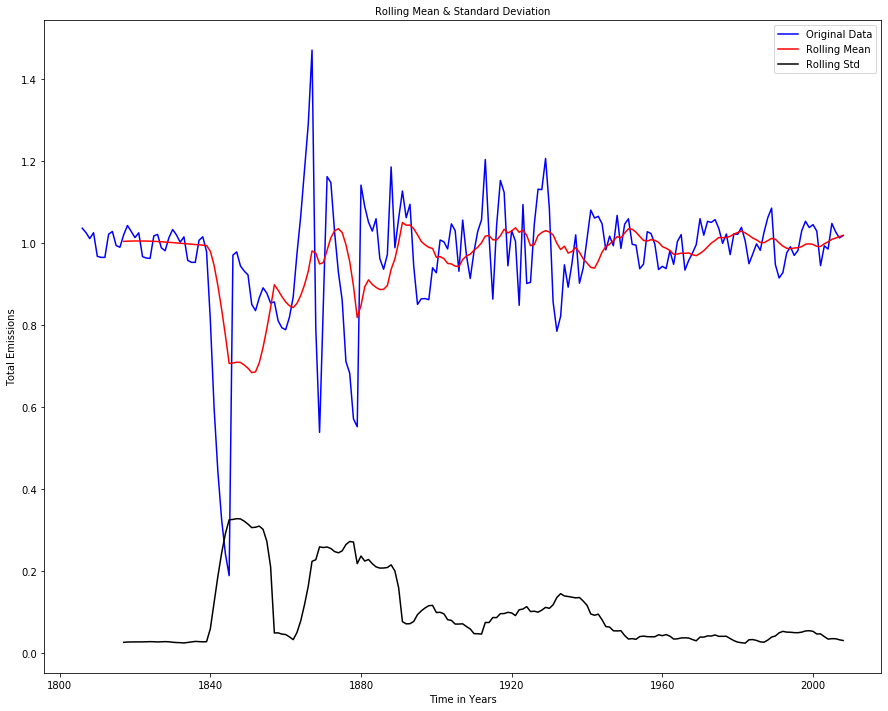

Test Statistic                -6.969553e+00
p-value                        8.736199e-10
#Lags Used                     1.000000e+00
Number of Observations Used    2.010000e+02
Critical Value (1%)           -3.463309e+00
Critical Value (5%)           -2.876029e+00
Critical Value (10%)          -2.574493e+00
dtype: float64
Strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root, hence it is stationary


In [28]:
CO2_decompose = residual
CO2_decompose.dropna(inplace=True)
TestStationaryPlot(CO2_decompose)
TestStationaryAdfuller(CO2_decompose)

## FIND OPTIMAL PARAMETERS AND BUILD  MODELS.


#### 1.Number of Auto-Regressive (AR) terms (p)
#### 2.Number of Moving Average(MA) terms (q)
#### 3.Number of Differences (d)

### Plot the ACF and PACF charts and find the optimal parameters

### 1.Autocorrelation Function (ACF)

#### It is a measure of the correlation between the the time series (ts) with a lagged version of itself.

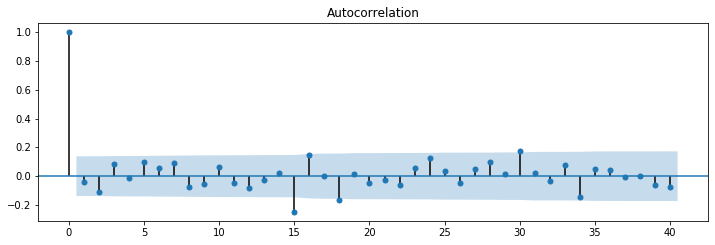

In [29]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(CO2_first_difference.iloc[13:], lags=40, ax=ax1)


### 2.Partial Autocorrelation Function (PACF)

#### This measures the correlation between the ts with a lagged version of itself but after eliminating the variations already explained by the intervening comparisons.

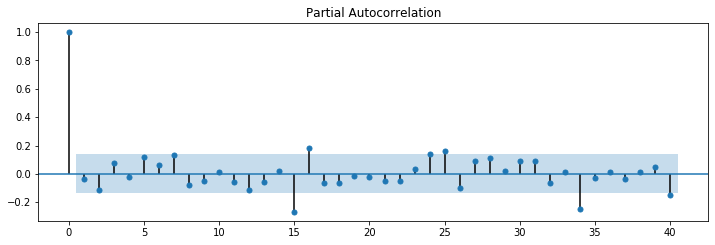

In [30]:
fig = plt.figure(figsize=(12,8))
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(CO2_first_difference.iloc[13:], lags=40, ax=ax2)

## MODEL BUILDING

In [31]:
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  
    me = np.mean(forecast - actual)             
    mae = np.mean(np.abs(forecast - actual))    
    mpe = np.mean((forecast - actual)/actual)   
    rmse = np.mean((forecast - actual)**2)**.5  
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse})


### 1. Autoreggresive AR Model

In [32]:
X = CO2_1.values
train = X[0:200] # 200 data as train data
test = X[200:]  # 15 data as test data
predictions = []

In [33]:
train.size , test.size

(200, 15)

In [34]:
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error

In [35]:
model_ar = AR(train)
model_ar_fit = model_ar.fit()


In [36]:
print(model_ar_fit.summary())

                               AR Model Results                               
Dep. Variable:                      y   No. Observations:                  200
Model:                         AR(14)   Log Likelihood                -150.865
Method:                          cmle   S.D. of innovations              0.545
Date:                Mon, 02 Aug 2021   AIC                             -1.044
Time:                        15:37:42   BIC                             -0.766
Sample:                             0   HQIC                            -0.931
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0864      0.061      1.424      0.154      -0.033       0.205
L1.y           0.9445      0.076     12.365      0.000       0.795       1.094
L2.y          -0.0714      0.105     -0.681      0.4

In [37]:
predictions = model_ar_fit.predict(start=200,end=215)
predictions

array([16.90759259, 17.19460987, 17.63017313, 17.88524654, 18.01818656,
       18.10003172, 18.20738453, 18.34817903, 18.49503198, 18.61074955,
       18.69572457, 18.81199046, 18.93197329, 19.01298745, 19.08396124,
       19.17822052])

In [38]:
test

array([[17.4],
       [17. ],
       [16.6],
       [17.5],
       [17.3],
       [17.3],
       [16.7],
       [16.8],
       [16.8],
       [15.9],
       [15.6],
       [15.6],
       [14.8],
       [14.7],
       [15.1]])

In [39]:
forecast_accuracy(predictions, test)

{'mape': 0.12626473235242236,
 'me': 1.979502690242003,
 'mae': 2.0018660032857576,
 'mpe': 0.12497814400450308,
 'rmse': 2.2856504000388265}

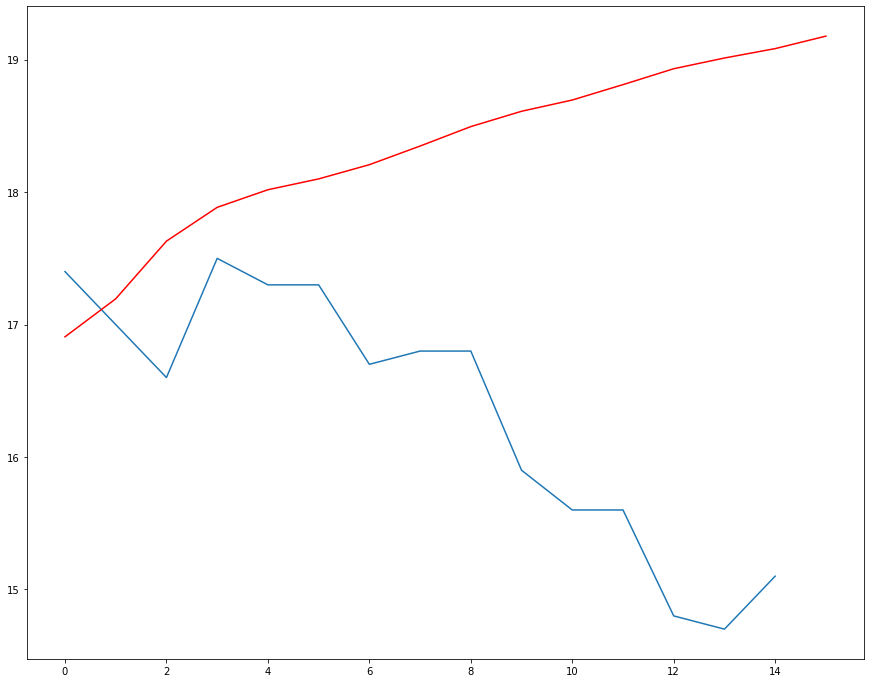

In [40]:
plt.plot(test)
plt.plot(predictions,color='red')

### the p values in the summary  and the graph clearly shows AR model didnt predicted the values well and is not a good model for forecasting.

## ARIMA MODEL

### to find optimal features in ARIMA we used different methods.

###  A] MANUALLY

In [41]:
from statsmodels.tsa.arima_model import ARIMA

In [42]:
print(train.shape , test.shape)

(200, 1) (15, 1)


In [43]:
import itertools
p=d=q=range(0,5)
pdq = list(itertools.product(p,d,q))
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 0, 3),
 (0, 0, 4),
 (0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (0, 1, 4),
 (0, 2, 0),
 (0, 2, 1),
 (0, 2, 2),
 (0, 2, 3),
 (0, 2, 4),
 (0, 3, 0),
 (0, 3, 1),
 (0, 3, 2),
 (0, 3, 3),
 (0, 3, 4),
 (0, 4, 0),
 (0, 4, 1),
 (0, 4, 2),
 (0, 4, 3),
 (0, 4, 4),
 (1, 0, 0),
 (1, 0, 1),
 (1, 0, 2),
 (1, 0, 3),
 (1, 0, 4),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (1, 1, 4),
 (1, 2, 0),
 (1, 2, 1),
 (1, 2, 2),
 (1, 2, 3),
 (1, 2, 4),
 (1, 3, 0),
 (1, 3, 1),
 (1, 3, 2),
 (1, 3, 3),
 (1, 3, 4),
 (1, 4, 0),
 (1, 4, 1),
 (1, 4, 2),
 (1, 4, 3),
 (1, 4, 4),
 (2, 0, 0),
 (2, 0, 1),
 (2, 0, 2),
 (2, 0, 3),
 (2, 0, 4),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3),
 (2, 1, 4),
 (2, 2, 0),
 (2, 2, 1),
 (2, 2, 2),
 (2, 2, 3),
 (2, 2, 4),
 (2, 3, 0),
 (2, 3, 1),
 (2, 3, 2),
 (2, 3, 3),
 (2, 3, 4),
 (2, 4, 0),
 (2, 4, 1),
 (2, 4, 2),
 (2, 4, 3),
 (2, 4, 4),
 (3, 0, 0),
 (3, 0, 1),
 (3, 0, 2),
 (3, 0, 3),
 (3, 0, 4),
 (3, 1, 0),
 (3, 1, 1),
 (3, 1, 2),
 (3,

In [44]:
import warnings
warnings.filterwarnings('ignore')
for param in pdq:
    try:
        model_arima = ARIMA(train,order=param)
        model_arima_fit = model_arima.fit()
        print(param,model_arima_fit.aic)
    except:
        continue
    

(0, 0, 0) 1299.2320956464557
(0, 0, 1) 1048.8593369555965
(0, 0, 2) 873.0177812861186
(0, 0, 3) 738.0657070795585
(0, 0, 4) 646.7407936256736
(0, 1, 0) 331.09607984557715
(0, 1, 1) 332.679663693284
(0, 1, 2) 332.37359454408795
(0, 1, 3) 332.84978306862615
(0, 1, 4) 334.8280053555123
(0, 2, 0) 475.55005000417566
(0, 2, 1) 336.557672784626
(0, 2, 2) 338.1134400084567
(0, 2, 3) 337.7261567807844
(0, 2, 4) 338.2358608237523
(1, 0, 0) 344.56377977069167
(1, 1, 0) 332.7703189863616
(1, 1, 1) 334.14746498504735
(1, 1, 2) 332.2302871923207
(1, 1, 3) 334.2023226857581
(1, 1, 4) 336.2001715119544
(1, 2, 0) 429.31048480667795
(1, 2, 1) 338.21241478372144
(1, 2, 3) 337.60371693806496
(1, 2, 4) 339.5827058883022
(2, 0, 0) 346.5205659902961
(2, 1, 0) 332.2288069145701
(2, 1, 1) 332.22089680198656
(2, 1, 2) 334.19974333679494
(2, 1, 3) 333.32576714234006
(2, 1, 4) 336.1972552834528
(2, 2, 0) 391.79970299746174
(2, 2, 1) 337.5756959456378
(2, 2, 2) 337.6145039561193
(2, 2, 3) 332.38016628834293
(2, 2,

In [45]:
model_arima = sm.tsa.ARIMA(train,order=(4, 1, 4))
model_arima_fit = model_arima.fit()

In [46]:
print(model_arima_fit.aic)

328.4195911960737


In [47]:
model_arima_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                  199
Model:                 ARIMA(4, 1, 4)   Log Likelihood                -154.210
Method:                       css-mle   S.D. of innovations              0.515
Date:                Mon, 02 Aug 2021   AIC                            328.420
Time:                        15:38:44   BIC                            361.353
Sample:                             1   HQIC                           341.748
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0846      0.039      2.146      0.032       0.007       0.162
ar.L1.D.y     -0.2075      0.049     -4.213      0.000      -0.304      -0.111
ar.L2.D.y      1.0561      0.061     17.230      0.000       0.936       1.176
ar.L3.D.y     -0.2033      0.051     -3.983      0.000      -0.303      -0.103
ar.L4.D.y     -0.8176      0.045    -18.022      0.000      -0.907      -0.729
ma.L1.D.y      0.2424        nan        nan        nan         nan         nan
ma.L2.D.y     -1.2168      0.010   -126.129      0.000      -1.236      -1.198
ma.L3.D.y      0.2424        nan        nan        nan         nan         nan
ma.L4.D.y      1.0000        nan        nan        nan         nan         nan
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.8758           -0.5773j            1.0489           -0.0928
AR.2            0.8758           +0.5773j            1.0489            0.0928
AR.3           -1.0001           -0.3337j            1.0543           -0.4487
AR.4           -1.0001           +0.3337j            1.0543            0.4487
MA.1            0.8382           -0.5454j            1.0000           -0.0918
MA.2            0.8382           +0.5454j            1.0000            0.0918
MA.3           -0.9594           -0.2820j            1.0000           -0.4545
MA.4           -0.9594           +0.2820j            1.0000            0.4545
-----------------------------------------------------------------------------
"""

##### The coef column shows the weight (i.e. importance) of each feature and how each one impacts the time series. The P>|z| column informs us of the significance of each feature weight. Here, each weight has a p-value close to 0, so it is reasonable to include the features in our model.¶

In [48]:
predictions1 = model_arima_fit.forecast(steps=15)[0]
predictions1

array([16.80003741, 16.92507342, 16.94959859, 17.09980188, 17.25006043,
       17.36950863, 17.5520349 , 17.58616665, 17.72392794, 17.69583377,
       17.79019703, 17.7842502 , 17.87743732, 17.95482355, 18.06045463])

In [49]:
test

array([[17.4],
       [17. ],
       [16.6],
       [17.5],
       [17.3],
       [17.3],
       [16.7],
       [16.8],
       [16.8],
       [15.9],
       [15.6],
       [15.6],
       [14.8],
       [14.7],
       [15.1]])

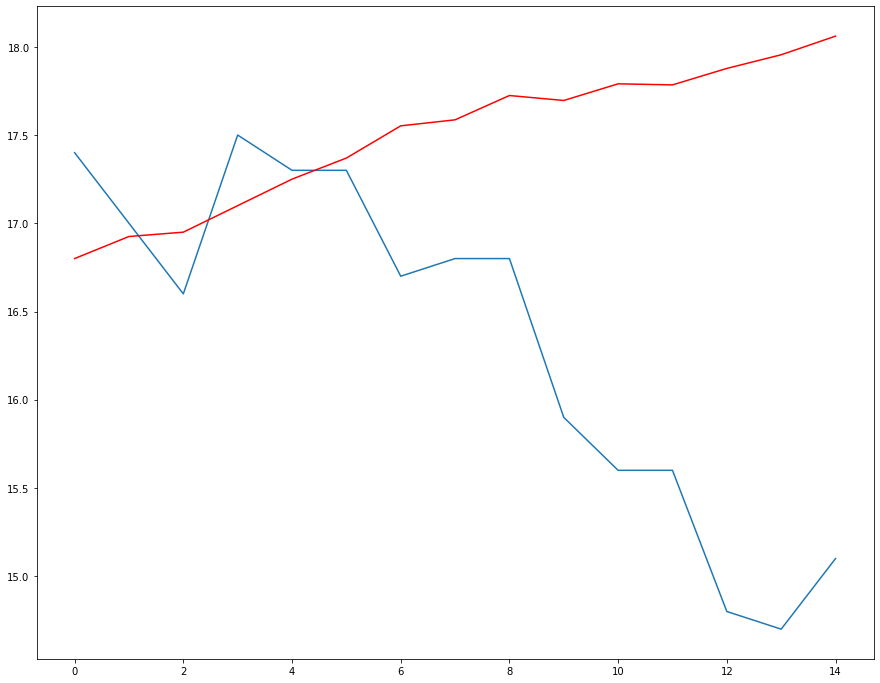

In [50]:
plt.plot(test)
plt.plot(predictions1,color='red')

In [51]:
test.mean()

16.34

In [52]:
forecast_accuracy(predictions1, test)

{'mape': 0.07835736769851906,
 'me': 1.1546137564411618,
 'mae': 1.2247291915749328,
 'mpe': 0.07432272843738627,
 'rmse': 1.5393227334491877}

##### the rmse is less than mean which makes our model a good model.

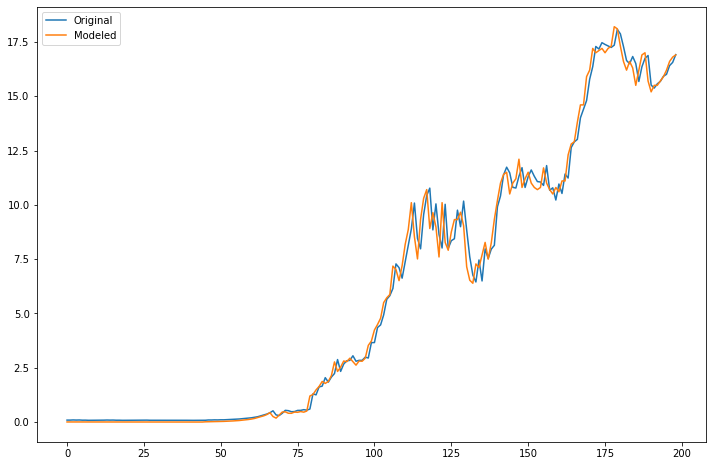

In [53]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 8

fig, ax = plt.subplots(1, 1)
pred_sm = model_arima_fit.plot_predict(ax=ax)
plt.legend(['Original', 'Modeled'])

In [54]:
from matplotlib import pyplot

               0
count  15.000000
mean   -1.154614
std     1.322272
min    -3.254824
25%    -2.187224
50%    -0.852035
75%    -0.009785
max     0.599963


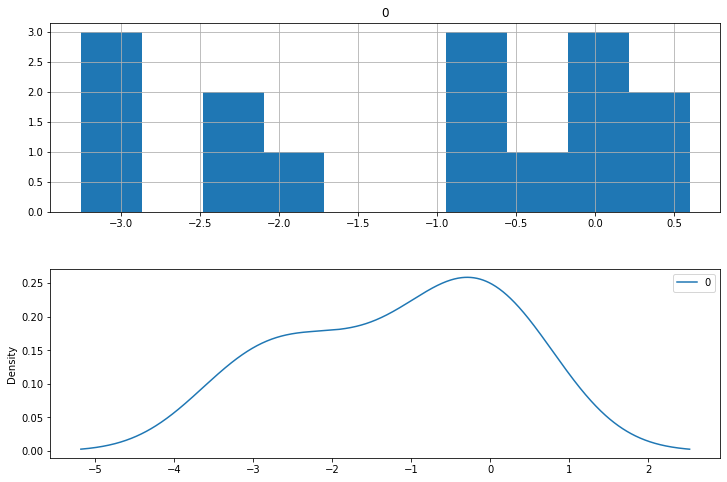

In [55]:
# errors
residuals = [test[i]-predictions1[i] for i in range(len(test))]
residuals = pd.DataFrame(residuals)
print(residuals.describe())
pyplot.figure()
pyplot.subplot(211)
residuals.hist(ax=pyplot.gca())
pyplot.subplot(212)
residuals.plot(kind='kde', ax=pyplot.gca())
pyplot.show()

### The distribution of residual errors is also plotted.We can see that the distribution has a right shift and that the mean is non-zero at -1.1546 which is negligible and equal to 0.



### also tried GRID SEARCH 

In [56]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [57]:
warnings.filterwarnings("ignore") # specify to ignore warning messages

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(CO2_1,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:1567.9628048847694
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1282.758340260557
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:888.0644165901858
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:849.0337226932495
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:876.3013822726496
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:870.7678085223781
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:852.459186414344
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:842.5493640272609
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:1286.1096976501494
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:1025.2181894850714
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:677.2842636253806
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:650.0093952087573
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:674.5850537100939
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:667.0608028199679
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:654.9199065951159
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:652.0133854928952
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:354.38289854196603
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:347.6187533155511
ARIMA(0

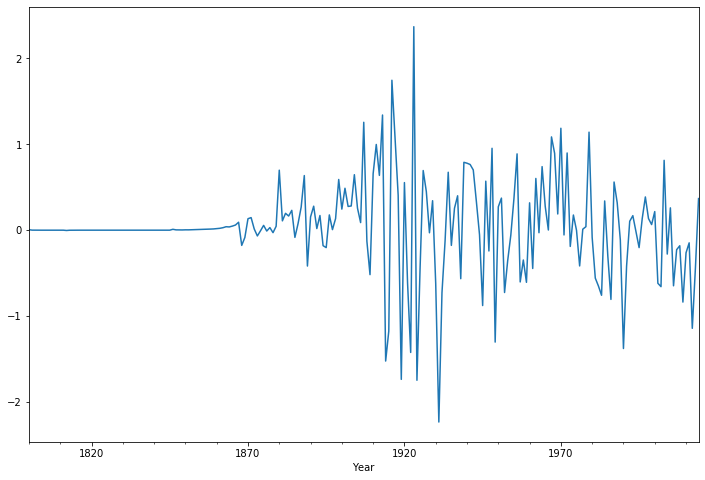

In [58]:
results.resid.plot(figsize=(12,8))

In [59]:
print(results.resid.describe())

count    215.000000
mean       0.032817
std        0.546816
min       -2.232725
25%       -0.062371
50%        0.000044
75%        0.237945
max        2.368101
dtype: float64


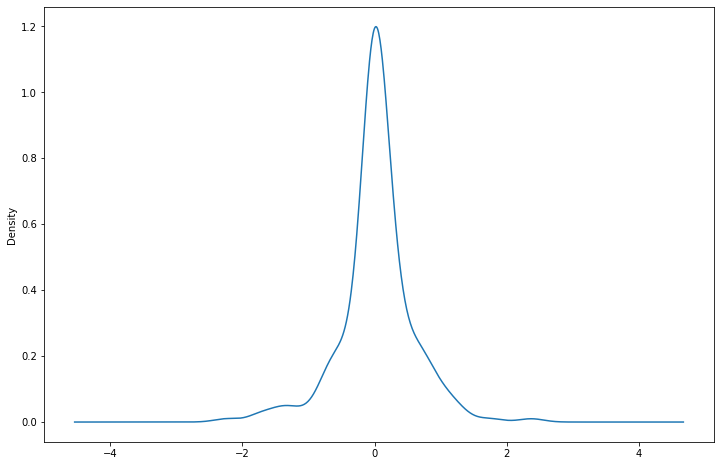

In [60]:
results.resid.plot(figsize=(12,8),kind='kde')

##### The figure displays the distribution of the residual errors. It shows a little bias in the prediction. Next, we get a density plot of the residual error values, suggesting the errors are Gaussian, but may not be centered on zero.

### The plot_diagnostics object allows us to quickly generate model diagnostics and investigate for any unusual behavior.

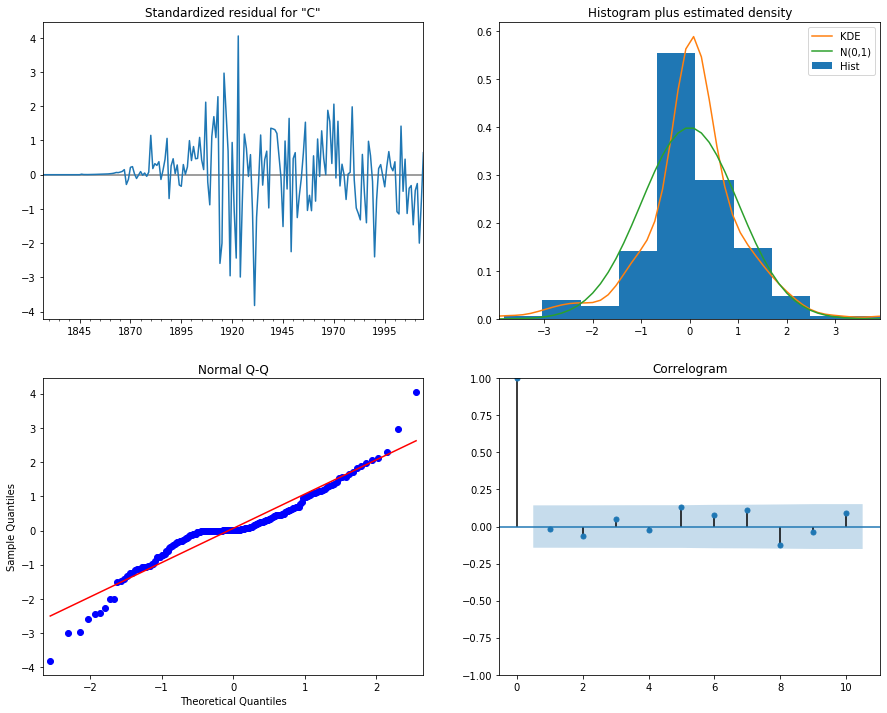

In [61]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

The model diagnostic suggests that the model residual is normally distributed based on the following:
In the top right plot, the red KDE line follows closely with the N(0,1) line. Where, N(0,1) is the standard notation for a normal distribution with mean 0 and standard deviation of 1. This is a good indication that the residuals are normally distributed. The forecast errors deviate somewhat from the straight line, indicating that the normal distribution is not a perfect model for the distribution of forecast errors, but it is not unreasonable.

The qq-plot on the bottom left shows that the ordered distribution of residuals (blue dots) follows the linear trend of the samples taken from a standard normal distribution. Again, this is a strong indication that the residuals are normally distributed.

The residuals over time (top left plot) don't display any obvious seasonality and appear to be white noise. This is confirmed by the autocorrelation (i.e. correlogram) plot on the bottom right, which shows that the time series residuals have low correlation with lagged versions of itself.

##### The above observations lead us to conclude that our model produces a satisfactory fit that could help us understand our time series data and forecast future values.

### VALIDATION

In [62]:
model2 = ARIMA(CO2_1["CO2"], order=(4,1,4))
model2 = model2.fit()               

In [63]:
CO2_1.tail()

,CO2
Year,
2010-01-01,15.6
2011-01-01,15.6
2012-01-01,14.8
2013-01-01,14.7
2014-01-01,15.1


In [64]:
CO2_1.head()

,CO2
Year,
1800-01-01,0.00568
1801-01-01,0.00561
1802-01-01,0.00555
1803-01-01,0.00548
1804-01-01,0.00542


# Future forecasting for CO2 values

In [65]:
future_pred=model2.predict(start=215,end = 230,typ = 'levels')

In [66]:
future_pred_df = future_pred.to_frame().reset_index()

In [67]:
future_pred_df.rename(columns = {'index':'Year',0:'CO2'},
          inplace = True)
future_pred_df

,Year,CO2
0,2015-01-01,15.206868
1,2016-01-01,15.174007
2,2017-01-01,15.381684
3,2018-01-01,15.311734
4,2019-01-01,15.549199
5,2020-01-01,15.490936
6,2021-01-01,15.683207
7,2022-01-01,15.671038
8,2023-01-01,15.779075
9,2024-01-01,15.833608


Text(0.5, 1.0, 'CO2 forecast upto year 2030')

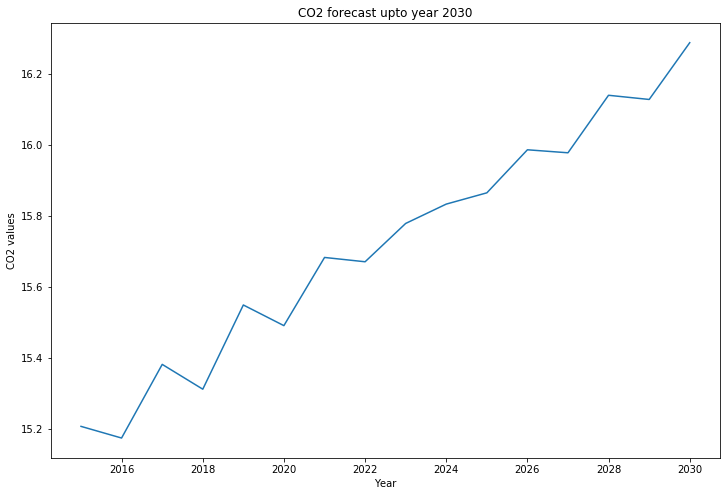

In [68]:
plt.plot(future_pred_df['Year'], future_pred_df['CO2'])
plt.xlabel('Year')
plt.ylabel('CO2 values')
  

plt.title('CO2 forecast upto year 2030')

In [69]:
future_df=pd.concat([CO2_1,future_pred_df])

In [70]:
CO2_1.reset_index(inplace=True)

In [71]:
current_future_df=pd.concat([CO2_1,future_pred_df])
current_future_df

,Year,CO2
0,1800-01-01,0.005680
1,1801-01-01,0.005610
2,1802-01-01,0.005550
3,1803-01-01,0.005480
4,1804-01-01,0.005420
...,...,...
11,2026-01-01,15.986805
12,2027-01-01,15.978338
13,2028-01-01,16.140513
14,2029-01-01,16.128711


In [72]:
current_future_df.tail(16)

,Year,CO2
0,2015-01-01,15.206868
1,2016-01-01,15.174007
2,2017-01-01,15.381684
3,2018-01-01,15.311734
4,2019-01-01,15.549199
5,2020-01-01,15.490936
6,2021-01-01,15.683207
7,2022-01-01,15.671038
8,2023-01-01,15.779075
9,2024-01-01,15.833608


ConversionError: Failed to convert value(s) to axis units: ['2015-01-01', '2030-01-01']

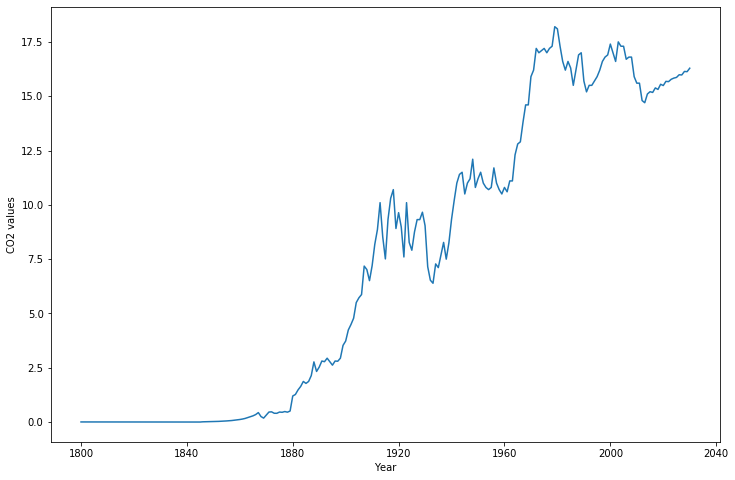

In [77]:
plt.plot(current_future_df['Year'], current_future_df['CO2'])
plt.xlabel('Year')
plt.ylabel('CO2 values')
plt.axvspan('2015-01-01', '2030-01-01', color='red', alpha=0.5)
plt.title('CO2 forecast upto year 2030 including current data')

In [ ]:
import pickle
pickle.dump(model2, open('forecasting_arima.pkl', 'wb'))